# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202304 
## SECTION: Regression
### VIDEO: Simple regression
#### TEACHER: Mike X Cohen, sincxpress.com

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

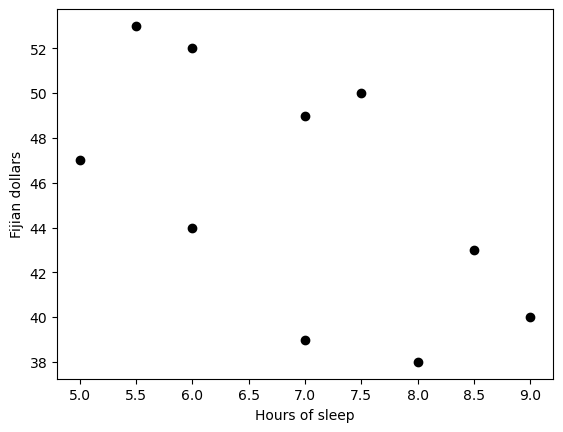

In [4]:
## example: effects of sleep on food spending

sleepHours = [5, 5.5, 6, 6, 7, 7, 7.5, 8, 8.5, 9]
dollars = [47, 53, 52, 44, 39, 49, 50, 38, 43, 40] # money spent on food shopping

# start by showing the data
plt.plot(sleepHours,dollars,'ko',markerfacecolor='k')
plt.xlabel('Hours of sleep')
plt.ylabel('Fijian dollars')
plt.show()

In [5]:
## "manual" regression via least-squares fitting

# create the design matrix - we multiple the b0 term by 1 to get the true intercept
desmat = np.vstack((np.ones(10),sleepHours)).T # use .T to transpose the rows to cols so we get the intercept and IVs as below
print(desmat) # first col is the intercept (all 1s) and 2nd col is the IV (hours sleep)

# compute the beta parameters (regression coefficients)
# use least squares solution to fit the design matrix onto the dependent variable
# the lstsq function computes the left inverse of the design matrix multipied by the outcome data (dollars spent) to compute the least squares solutions to the model to solve for Beta
beta = np.linalg.lstsq(desmat,dollars,rcond=None)[0] # solves for Beta coefficient (how much hours sleep on x-axis affects dollars spent)
print('beta: ', beta)

# predicted data values - what the model predicts people spend on food based on hours of sleep:
yHat = desmat@beta # the @ operator is for matrix multiplication - 
# multiplies 63 (the intercept) by the first col of all 1s
# the first col gets scaled by intercept, the second col gets scaled by the other beta (2.5)
# these are them summed together (each row has the intercept product and the beta2 product added together to get a prediction)
# this gives us yHat - our predicted value

print(63 + 5 * -2.5) # intercept summed with the other beta parameter
print(yHat)

[[1.  5. ]
 [1.  5.5]
 [1.  6. ]
 [1.  6. ]
 [1.  7. ]
 [1.  7. ]
 [1.  7.5]
 [1.  8. ]
 [1.  8.5]
 [1.  9. ]]
beta:  [62.84737679 -2.49602544]
50.5
[50.3672496  49.11923688 47.87122417 47.87122417 45.37519873 45.37519873
 44.12718601 42.87917329 41.63116057 40.38314785]


[5, 5.5, 6, 6, 7, 7, 7.5, 8, 8.5, 9]


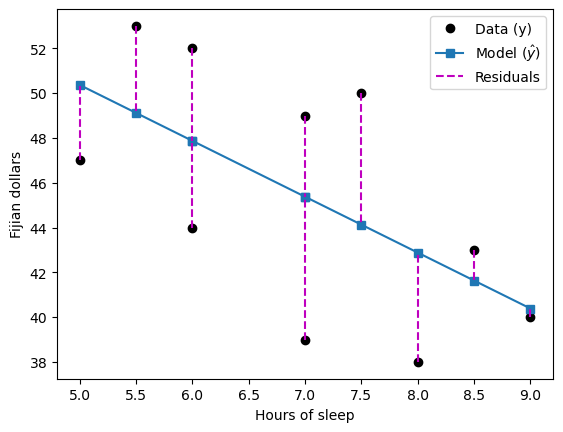

In [13]:
## show the predicted results on top of the "real" data

# show previous data - dv sleephours on x-axis and the iv dollars spent is on the y-axis
plt.plot(sleepHours,dollars,'ko',markerfacecolor='k') # shown as scatter plot points in black. 'ko' is black circles (k short for black in plotting libs)
# markerfacecolor fills in circle with black color

# predicted results - shown as a blue line
plt.plot(sleepHours,yHat,'s-') # s- means mark with squares (s) and connect the points with a line (-)

# show the residuals - dotted lines showing distance from predictions to actuals
# the line fit's goal as reminder is to get the square errors as small as possible
for i in range(10):
    # line coords: [x1,x2] [y1,y2] or draw line [from x, to x] [from  y, to y]
    plt.plot([sleepHours[i],sleepHours[i]],[dollars[i], yHat[i]],'m--') # dotted lines
    

plt.legend(('Data (y)','Model ($\^{y}$)','Residuals'))

plt.xlabel('Hours of sleep')
plt.ylabel('Fijian dollars')
plt.show()

In [14]:
## now with scipy - simpler way to do the same above

# input the independent varaible (number hours slept) and dependent variable (dollars spent)
# linregress assumes an intercept for you and you don't have to specify it or pass in a design matrix
slope,intercept,r,p,std_err = stats.linregress(sleepHours,dollars)
print(intercept,slope) # outputs of the linregress fn
print(beta) # beta has been computed previously: beta = np.linalg.lstsq(desmat,dollars,rcond=None)[0] # solves for Beta coefficient (how much hours sleep on x-axis affects dollars spent)
# intercept from linregress fn matches first entry from np.linalg.lstsq fn and the slope matches the second term

62.84737678855326 -2.4960254372019075
[62.84737679 -2.49602544]


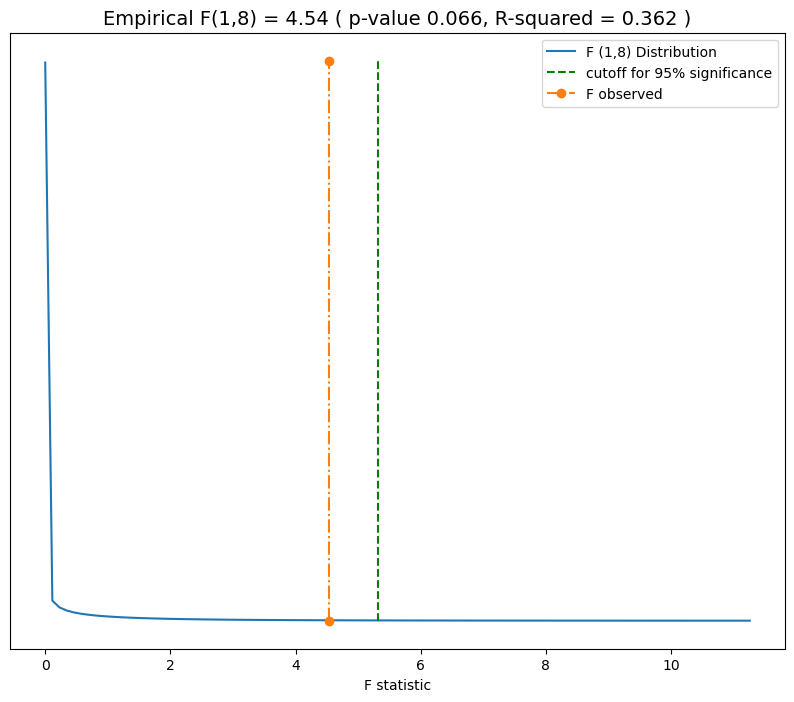

In [15]:
### R-squared and F-statistic
from scipy.stats import f
 
# get slope and intercept for y_hat 
slope,intercept,r,p,std_err = stats.linregress(sleepHours,dollars)
 
y = np.array(dollars)
N = len(y)
k = 2 # the betas including B0 for the intercept
 
dfn = k - 1 # numerator degrees of freedom
dfd = N - k # denominator degrees of freedom
 
x = np.array(sleepHours)
yHat = intercept + slope * x
 
# calculate rsquared
y_mean = y.mean()
SSError = np.sum((y - yHat)**2)
SSModel = np.sum((yHat - y_mean)**2)
SSTotal = np.sum((y - y_mean)**2) # or SSError + SSModel
Rsquared = 1 - SSError / SSTotal
R = np.sqrt(Rsquared)
 
# calculate F
F = (SSModel / (k-1)) / (SSError / (N - k))
 
# pvalue
p = 1 - f.cdf(F, dfn, dfd)
 
# f score at .95
sig_cutoff = f.ppf(.95, dfn, dfd)
 
plt.figure(figsize=(10,8))
x = np.linspace(f.ppf(.01, dfn, dfd), f.ppf(.99, dfn, dfd), 100)
plt.plot(x, f.pdf(x, dfn, dfd))
plt.plot([sig_cutoff, sig_cutoff], [0, 30], 'g--')
plt.plot([F, F], [0, 30], 'o-.')
plt.legend(['F (1,8) Distribution', 'cutoff for 95% significance', 'F observed'])
plt.xlabel('F statistic')
plt.yticks([])
plt.ylabel('')
plt.title(f'Empirical F({dfn},{dfd}) = {F:.2f} ( p-value {p:.3f}, R-squared = {Rsquared:.3f} )', fontsize=14)
plt.show()